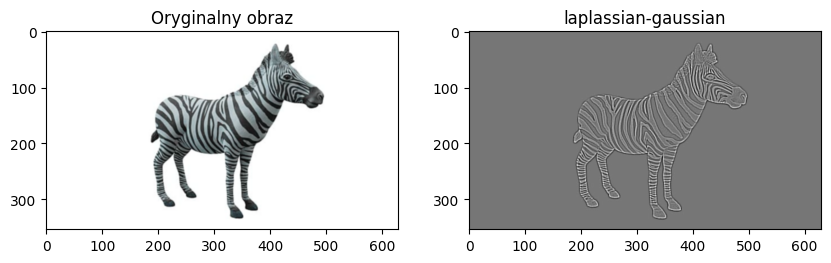

In [10]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"zebra.jpg", cv2.IMREAD_COLOR)
image = cv2.GaussianBlur(image, (3, 3), 0)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Laplacian(image_gray, cv2.CV_16S, ksize=3)
# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Oryginalny obraz')

plt.subplot(122)
plt.imshow(filtered_image, cmap='gray')
plt.title('laplassian-gaussian')

plt.show()

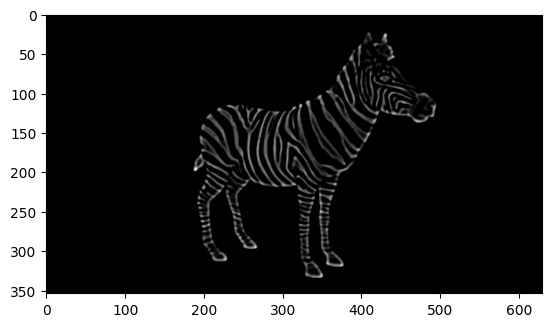

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def LoG_filter_opencv(image, sigma, size=None):
    # Generate LoG kernel
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    # Perform convolution using OpenCV filter2D
    result = cv2.filter2D(image, -1, kernel)

    return result

# Example usage:
image = cv2.imread(r"zebra.jpg", cv2.IMREAD_GRAYSCALE)  # Replace 'path_to_your_image.png' with your image path
sigma = 2.0
filtered_image = LoG_filter_opencv(image, sigma)
filtered_image = cv2.convertScaleAbs(filtered_image)
plt.imshow(filtered_image, cmap="gray")

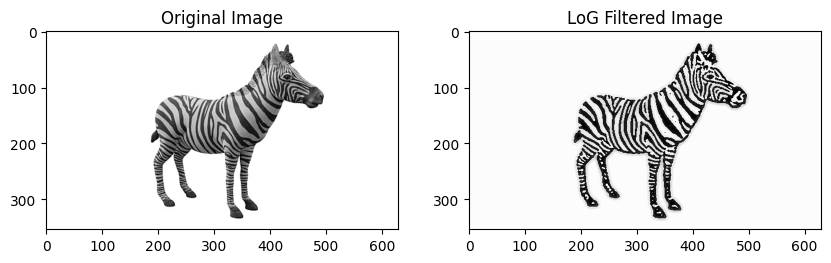

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy import misc

def LoG_filter(image, sigma, size=None):
    # Generate LoG kernel
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    # Perform convolution
    result = convolve(image, kernel)

    return result

# Example usage:
image = cv2.imread(r"zebra.jpg", cv2.IMREAD_GRAYSCALE)  # Replace 'path_to_your_image.png' with your image path
sigma = 2.0
filtered_image = LoG_filter(image, sigma)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')

plt.subplot(122)
plt.imshow(filtered_image, cmap='gray')
plt.show()

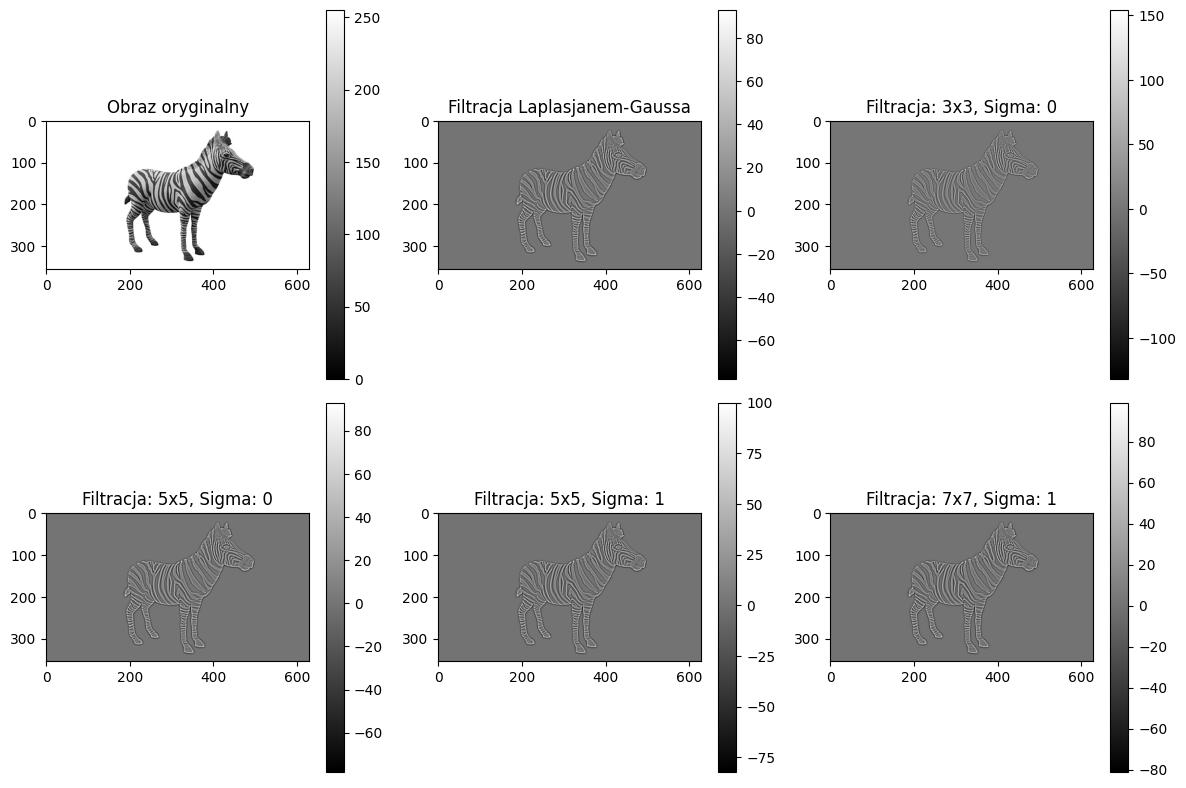

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# adres obrazu zebry
url = "https://images.twinkl.co.uk/tw1n/image/private/t_630_eco/image_repo/70/1b/zebra_ver_3.jpg"  

# wysłanie prośby do adresu obrazu aby pobrać obraz
response = requests.get(url)

# sprawdź czy prośba została odebrana
if response.status_code == 200:
    # sczytaj dane z pobranego obrazu
    image_data = response.content

    # zamień dane obrazu na tablice biblioteki NumPy
    nparr = np.frombuffer(image_data, np.uint8)

    # zamien tablice NumPy na obraz używając OpenCV
    image = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)

    # Filtracja Laplasjanem-Gaussa
    laplacian = cv2.GaussianBlur(image, (5, 5), 0)
    laplacian = cv2.Laplacian(laplacian, cv2.CV_64F)

    # Wyświetlanie obrazów
    plt.figure(figsize=(12, 8))

    # Obraz oryginalny
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Obraz oryginalny')
    plt.colorbar()

    # Obraz po filtracji Laplasjanem-Gaussa
    plt.subplot(2, 3, 2)
    plt.imshow(laplacian, cmap='gray')
    plt.title('Filtracja Laplasjanem-Gaussa')
    plt.colorbar()

    # Porównanie różnych wielkości filtru i odchylenia standardowego
    for i, (kernel_size, sigma) in enumerate([(3, 0), (5, 0), (5, 1), (7, 1)]):
        laplacian = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
        laplacian = cv2.Laplacian(laplacian, cv2.CV_64F)

        plt.subplot(2, 3, i + 3)
        plt.imshow(laplacian, cmap='gray')
        plt.title(f'Filtracja: {kernel_size}x{kernel_size}, Sigma: {sigma}')
        plt.colorbar()

    plt.tight_layout()
    plt.show()

else:
    print("nie udało sie załadowac obrazu")

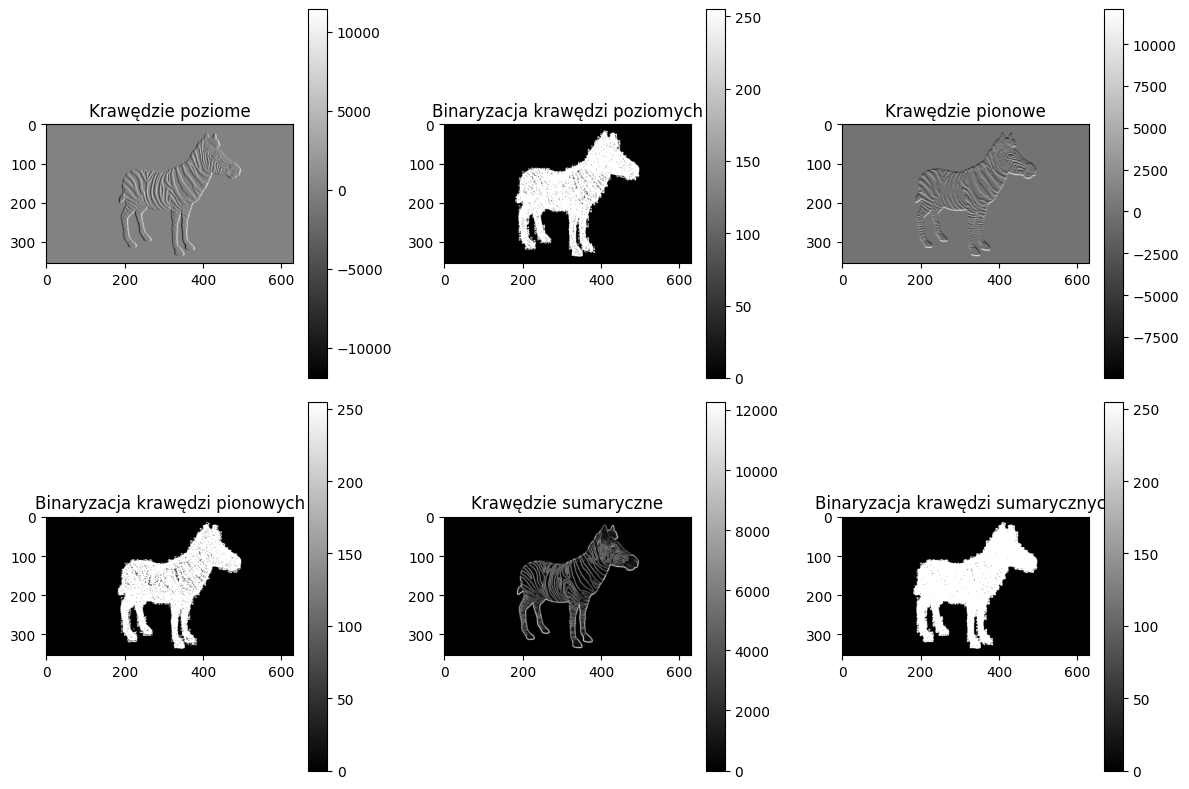

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# adres obrazu zebry
url = "https://images.twinkl.co.uk/tw1n/image/private/t_630_eco/image_repo/70/1b/zebra_ver_3.jpg"  

# wysłanie prośby do adresu obrazu aby pobrać obraz
response = requests.get(url)

# sprawdź czy prośba została odebrana
if response.status_code == 200:
    # sczytaj dane z pobranego obrazu
    image_data = response.content

    # zamień dane obrazu na tablice biblioteki NumPy
    nparr = np.frombuffer(image_data, np.uint8)

    # zamien tablice NumPy na obraz używając OpenCV
    image = cv2.imdecode(nparr, cv2.IMREAD_GRAYSCALE)

    # Operatory Sobela dla krawędzi poziomych i pionowych
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

    # Operatory Sobela dla krawędzi sumarycznych
    sobel_combined = np.sqrt(np.square(sobelx) + np.square(sobely))

    # Binaryzacja obrazów
    _, sobelx_binary = cv2.threshold(np.abs(sobelx), 50, 255, cv2.THRESH_BINARY)
    _, sobely_binary = cv2.threshold(np.abs(sobely), 50, 255, cv2.THRESH_BINARY)
    _, sobel_combined_binary = cv2.threshold(sobel_combined, 50, 255, cv2.THRESH_BINARY)

    # Wyświetlanie obrazów
    plt.figure(figsize=(12, 8))

    # Krawędzie poziome
    plt.subplot(2, 3, 1)
    plt.imshow(sobelx, cmap='gray')
    plt.title('Krawędzie poziome')
    plt.colorbar()

    plt.subplot(2, 3, 2)
    plt.imshow(sobelx_binary, cmap='gray')
    plt.title('Binaryzacja krawędzi poziomych')
    plt.colorbar()

    # Krawędzie pionowe
    plt.subplot(2, 3, 3)
    plt.imshow(sobely, cmap='gray')
    plt.title('Krawędzie pionowe')
    plt.colorbar()

    plt.subplot(2, 3, 4)
    plt.imshow(sobely_binary, cmap='gray')
    plt.title('Binaryzacja krawędzi pionowych')
    plt.colorbar()

    # Krawędzie sumaryczne
    plt.subplot(2, 3, 5)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title('Krawędzie sumaryczne')
    plt.colorbar()

    plt.subplot(2, 3, 6)
    plt.imshow(sobel_combined_binary, cmap='gray')
    plt.title('Binaryzacja krawędzi sumarycznych')
    plt.colorbar()

    plt.tight_layout()
    plt.show()
else:
    print("nie udało sie załadowac obrazu")